In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
with open("/content/drive/MyDrive/Capstone Raw Data/data_clean.csv","r") as file:
    # we'll read that into a variable called tweets
    Survey_Raw_Data = list(map(lambda d: d.strip().split(','), file.readlines()))
    for row in Survey_Raw_Data:
        print(row)

['id', 'district', 'location', 'respondent', 'age', 'marital', 'tour_involve', 'tour_involve_how', 'own_business', 'years_in_tourism', 'education', 'access_to_funds', 'quality_of_life', 'children', 'children_num', 'q11', 'q11_no_of_them', 'partner_help_tourism', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24']
['1', 'Hunza', 'Altit', 'Altit 1', '46', 'Married', 'Yes', 'Heritage Site', 'No', '17years', 'High School', 'Yes', 'Good', 'No', '5', 'Yes', 'NA', 'No', 'No', 'Non-related Business Partner', 'A Lot', 'Yes', 'Investments', 'Yes', 'Yes-Education Support/Financial Support', 'Herself', 'No-husband', 'Yes', 'Yes', 'Yes']
['2', 'Hunza', 'Altit', 'Altit 2', '37', 'Not Married', 'No', 'No', 'No', 'NA', 'Primary School', 'Yes', 'Average', 'No', 'NA', 'N/A', 'NA', 'N/A', 'N/A', 'Self', 'A Lot', 'No', "Don't Know", 'Yes', 'Financial Support', 'Herself', 'NA', 'Yes', 'Yes', 'Yes']
['3', 'Hunza', 'Altit', 'Altit 3', '50', 'Married', 'Yes', 'Garments Store', 

<ipython-input-36-fed001c6f09d>:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



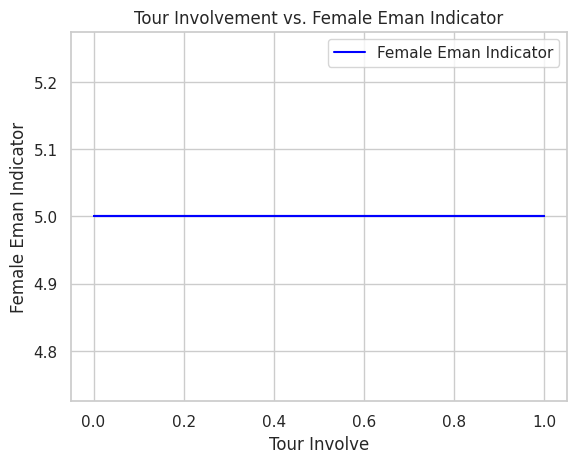

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean.csv')

# Replace Yes and No with 1 and 0 in columns q21, q22, q23, q24, and answer. Ignore values that are not Yes or No. Case insensitive.
df[['q21', 'q22', 'q23', 'q24']] = df[['q21', 'q22', 'q23', 'q24']].apply(lambda x: x.str.lower()).replace({'yes': 1, 'no': 0})

# Add the aggregate sum of values for Yes and No for each row. Now do the same for all rows and keep each row as one data point. Assign a new variable 'Female_eman_indicator' for this aggregate sum for each row. Repeat step for each row.
df['Yes'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)
df['No'] = 5 - df['Yes']
df['Female_eman_indicator'] = df[['Yes', 'No']].sum(axis=1)

# Code the value of tour_involve for each row as 1 for Yes and 0 for No. Ignore values that are not Yes or No. Case insensitive. Now do the same for all the rows and keep each row as one data point.
df['tour_involve'] = df['tour_involve'].fillna('NA').apply(lambda x: 1 if x.lower() == 'yes' else (0 if x.lower() == 'no' else None)).dropna()

# Plot the graph. Make sure it is a line graph.
plt.plot(df['tour_involve'], df['Female_eman_indicator'], color='blue', label='Female Eman Indicator')
plt.xlabel('Tour Involve')
plt.ylabel('Female Eman Indicator')
plt.title('Tour Involvement vs. Female Eman Indicator')
plt.legend()
plt.show()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean.csv')

# Replace Yes and No with 1 and 0 in columns q21, q22, q23, q24, and answer. Ignore values that are not Yes or No. Case insensitive.
df[['q21', 'q22', 'q23', 'q24']] = df[['q21', 'q22', 'q23', 'q24']].apply(lambda x: x.str.lower()).replace({'yes': 1, 'no': 0})

# Add the aggregate sum of values for Yes and No for each row. Now do the same for all rows and keep each row as one data point. Assign a new variable 'Female_eman_indicator' for this aggregate sum for each row. Repeat step for each row.
df['Yes'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)
df['No'] = 5 - df['Yes']
df['Female_eman_indicator'] = df[['Yes', 'No']].sum(axis=1)

# Code the value of tour_involve for each row as 1 for Yes and 0 for No. Ignore values that are not Yes or No. Case insensitive. Now do the same for all the rows and keep each row as one data point.
df['tour_involve'] = df['tour_involve'].apply(lambda x: 1 if x.lower() == 'yes' else (0 if x.lower() == 'no' else None)).dropna()

# Control for age and location by grouping the data by age and location and calculating the mean of the Female Eman Indicator for each group.
df_grouped = df.groupby(['age', 'location']).agg({'Female_eman_indicator': 'mean'}).reset_index()

# Plot the graph. Make sure it is a line graph.
plt.plot(df_grouped['age'], df_grouped['Female_eman_indicator'], color='blue', label='Female Eman Indicator')
plt.xlabel('Age')
plt.ylabel('Female Eman Indicator')
plt.title('Age vs. Female Eman Indicator')
plt.legend()
plt.show()

<ipython-input-37-a82db7f3e68c>:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



AttributeError: ignored

<ipython-input-40-7a2d3389c357>:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



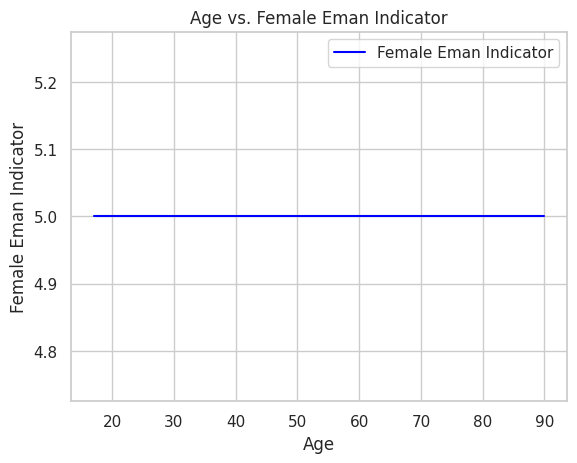

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean.csv')

# Replace Yes and No with 1 and 0 in columns q21, q22, q23, q24, and answer. Ignore values that are not Yes or No. Case insensitive.
df[['q21', 'q22', 'q23', 'q24']] = df[['q21', 'q22', 'q23', 'q24']].apply(lambda x: x.str.lower()).replace({'yes': 1, 'no': 0})

# Add the aggregate sum of values for Yes and No for each row. Now do the same for all rows and keep each row as one data point. Assign a new variable 'Female_eman_indicator' for this aggregate sum for each row. Repeat step for each row.
df['Yes'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)
df['No'] = 5 - df['Yes']
df['Female_eman_indicator'] = df[['Yes', 'No']].sum(axis=1)

# Code the value of tour_involve for each row as 1 for Yes and 0 for No. Ignore values that are not Yes or No. Case insensitive. Now do the same for all the rows and keep each row as one data point.
df['tour_involve'] = df['tour_involve'].dropna().apply(lambda x: 1 if x.lower() == 'yes' else (0 if x.lower() == 'no' else None))

# Control for age and location by grouping the data by age and location and calculating the mean of the Female Eman Indicator for each group.
df_grouped = df.groupby(['age', 'location']).agg({'Female_eman_indicator': 'mean'}).reset_index()

# Plot the graph. Make sure it is a line graph.
plt.plot(df_grouped['age'], df_grouped['Female_eman_indicator'], color='blue', label='Female Eman Indicator')
plt.xlabel('Age')
plt.ylabel('Female Eman Indicator')
plt.title('Age vs. Female Eman Indicator')
plt.legend()
plt.show()

In [42]:
import pandas as pd

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')

# Create a dictionary to map 'Yes' to 1 and 'No' to 0
yes_no_map = {'Yes': 1, 'No': 0}

# Create new columns for q21, q22, q23, and q24 and map 'Yes' to 1 and 'No' to 0
df['q21_new'] = df['q21'].map(yes_no_map)
df['q22_new'] = df['q22'].map(yes_no_map)
df['q23_new'] = df['q23'].map(yes_no_map)
df['q24_new'] = df['q24'].map(yes_no_map)

# Sum the values of q21_new, q22_new, q23_new, and q24_new across rows and create a new column for the total
df['total'] = df['q21_new'] + df['q22_new'] + df['q23_new'] + df['q24_new']

# Calculate summary statistics for the entire file
summary_stats = df[['age', 'marital', 'tour_involve', 'education', 'quality_of_life','total']].describe()

# Print the summary statistics
print(summary_stats)

              age       total
count  415.000000  307.000000
mean    35.889157    3.140065
std     12.918259    1.058698
min     17.000000    0.000000
25%     26.000000    3.000000
50%     35.000000    3.000000
75%     43.000000    4.000000
max     90.000000    4.000000


In [43]:
import pandas as pd

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')

# Calculate summary statistics for the desired columns
age_stats = df['age'].describe()
marital_stats = df['marital'].value_counts(normalize=True)
tour_involve_stats = df['tour_involve'].value_counts(normalize=True)
education_stats = df['education'].value_counts(normalize=True)
quality_of_life_stats = df['quality_of_life'].value_counts(normalize=True)

# Print the summary statistics
print("Age Summary Statistics:")
print(age_stats)
print("\nMarital Summary Statistics:")
print(marital_stats)
print("\nTour Involvement Summary Statistics:")
print(tour_involve_stats)
print("\nEducation Summary Statistics:")
print(education_stats)
print("\nQuality of Life Summary Statistics:")
print(quality_of_life_stats)

Age Summary Statistics:
count    415.000000
mean      35.889157
std       12.918259
min       17.000000
25%       26.000000
50%       35.000000
75%       43.000000
max       90.000000
Name: age, dtype: float64

Marital Summary Statistics:
Married        0.756627
Not Married    0.243373
Name: marital, dtype: float64

Tour Involvement Summary Statistics:
No     0.780193
Yes    0.219807
Name: tour_involve, dtype: float64

Education Summary Statistics:
High School            0.363855
College                0.163855
No Formal Education    0.154217
Graduate Degree        0.144578
Secondary School       0.113253
Primary School         0.060241
Name: education, dtype: float64

Quality of Life Summary Statistics:
Good         0.515663
Average      0.397590
Very Good    0.072289
Bad          0.014458
Name: quality_of_life, dtype: float64


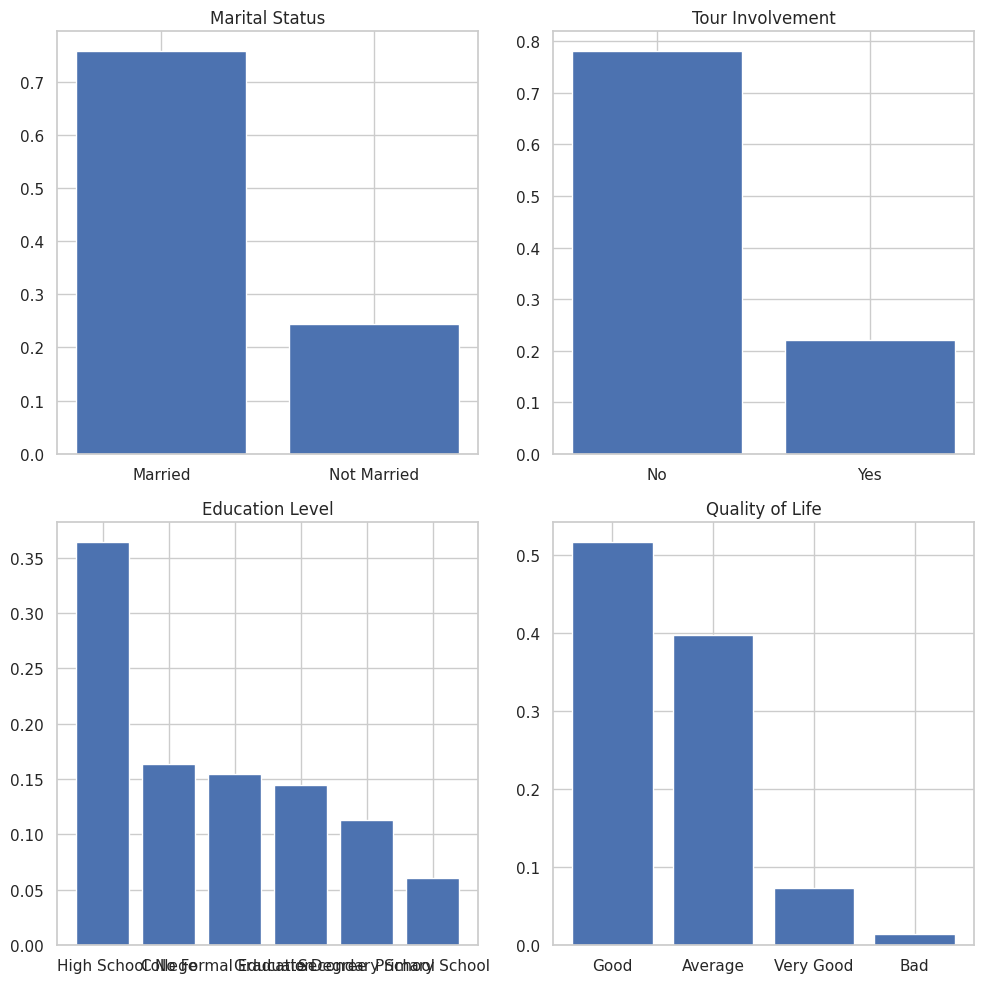

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')

# Create bar charts for the categorical columns
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(marital_stats.index, marital_stats.values)
axs[0, 0].set_title('Marital Status')
axs[0, 1].bar(tour_involve_stats.index, tour_involve_stats.values)
axs[0, 1].set_title('Tour Involvement')
axs[1, 0].bar(education_stats.index, education_stats.values)
axs[1, 0].set_title('Education Level')
axs[1, 1].bar(quality_of_life_stats.index, quality_of_life_stats.values)
axs[1, 1].set_title('Quality of Life')
plt.tight_layout()
plt.show()

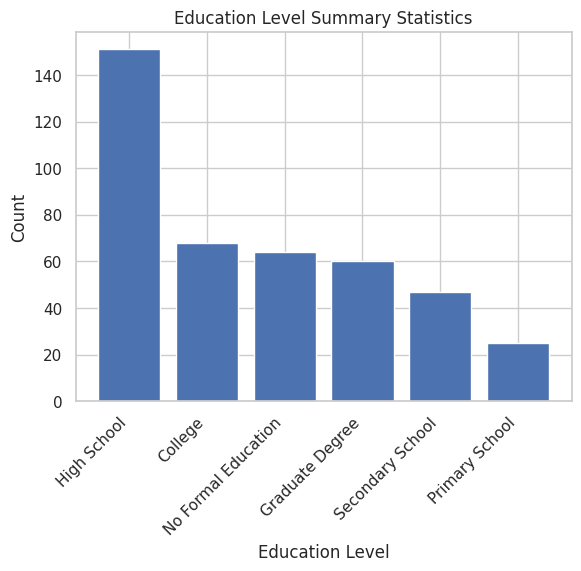

In [45]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')
# Calculate the value counts for the education column
education_counts = df['education'].value_counts()

# Create a bar chart for the education column
plt.bar(education_counts.index, education_counts.values)
plt.title('Education Level Summary Statistics')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Space out the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

In [46]:
import pandas as pd

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')

# Replace NaN values with 0
df = df.fillna(0)

# Create a dictionary to map 'Yes' to 1 and 'No' to 0
yes_no_map = {'yes': 1, 'no': 0}

# Create new columns for q21, q22, q23, and q24 and map 'Yes' to 1 and 'No' to 0
df['q21_new'] = df['q21'].str.lower().map(yes_no_map).fillna(0)
df['q22_new'] = df['q22'].str.lower().map(yes_no_map).fillna(0)
df['q23_new'] = df['q23'].str.lower().map(yes_no_map).fillna(0)
df['q24_new'] = df['q24'].str.lower().map(yes_no_map).fillna(0)

# Sum the values of q21_new, q22_new, q23_new, and q24_new across rows and create a new column for the total
df['Emancipation_indicator_score'] = df['q21_new'] + df['q22_new'] + df['q23_new'] + df['q24_new']

# Print the first 5 rows of the dataframe to verify the new column
df

,id,district,location,respondent,age,marital,tour_involve,tour_involve_how,own_business,years_in_tourism,...,q20,q21,q22,q23,q24,q21_new,q22_new,q23_new,q24_new,Emancipation_indicator_score
0,1,Hunza,Altit,Altit 1,46,Married,Yes,Heritage Site,No,17years,...,Herself,No-husband,Yes,Yes,Yes,0.0,1.0,1.0,1.0,3.0
1,2,Hunza,Altit,Altit 2,37,Not Married,No,No,No,0,...,Herself,0,Yes,Yes,Yes,0.0,1.0,1.0,1.0,3.0
2,3,Hunza,Altit,Altit 3,50,Married,Yes,Garments Store,Yes,16years,...,Family Members,No,Yes,Yes,Yes,0.0,1.0,1.0,1.0,3.0
3,4,Hunza,Altit,Altit 4,31,Married,Yes,No,Yes,9years,...,Herself,Yes,Yes,Yes,Yes,1.0,1.0,1.0,1.0,4.0
4,5,Hunza,Altit,Altit 5,19,Not Married,No,No,No,0,...,Financial Support/Family Pride/Respect,0,No,No-Family,Yes,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,411,Nagar,Pissan,Pissan 14,48,Married,No,No,No,0,...,Husband,No,yes,No,Yes,0.0,1.0,0.0,1.0,2.0
411,412,Nagar,Pissan,Pissan 15,60,Married,No,No,No,0,...,Elder Son,No,No,No,Yes,0.0,0.0,0.0,1.0,1.0
412,413,Nagar,Pissan,Pissan 16,26,Married,No,No,No,0,...,Husband and Wife,Yes,Yes,To some extent/Husband's Control,Yes,1.0,1.0,0.0,1.0,3.0
413,414,Nagar,Pissan,Pissan 17,28,Married,Yes,Partner with Husband,Yes,6years,...,Husband,No,Yes,Yes,Yes,0.0,1.0,1.0,1.0,3.0


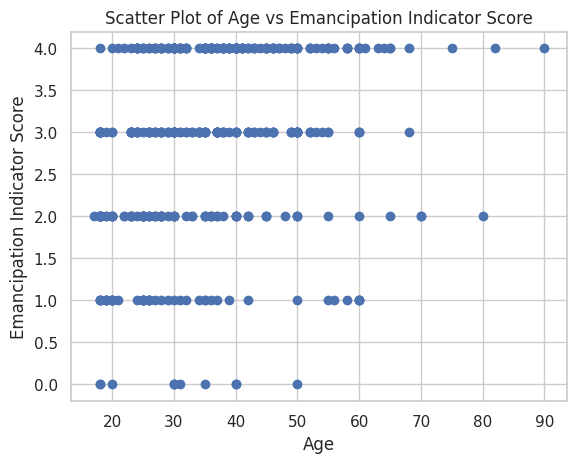

In [47]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')

# Replace NaN values with 0
df = df.fillna(0)

# Create a dictionary to map 'Yes' to 1 and 'No' to 0
yes_no_map = {'yes': 1, 'no': 0}

# Create new columns for q21, q22, q23, and q24 and map 'Yes' to 1 and 'No' to 0
df['q21_new'] = df['q21'].str.lower().map(yes_no_map).fillna(0)
df['q22_new'] = df['q22'].str.lower().map(yes_no_map).fillna(0)
df['q23_new'] = df['q23'].str.lower().map(yes_no_map).fillna(0)
df['q24_new'] = df['q24'].str.lower().map(yes_no_map).fillna(0)

# Sum the values of q21_new, q22_new, q23_new, and q24_new across rows and create a new column for the total
df['Emancipation_indicator_score'] = df['q21_new'] + df['q22_new'] + df['q23_new'] + df['q24_new']

# Create a scatter plot with age on the x-axis and Emancipation_indicator_score on the y-axis
plt.scatter(df['age'], df['Emancipation_indicator_score'])
plt.title('Scatter Plot of Age vs Emancipation Indicator Score')
plt.xlabel('Age')
plt.ylabel('Emancipation Indicator Score')
plt.show()

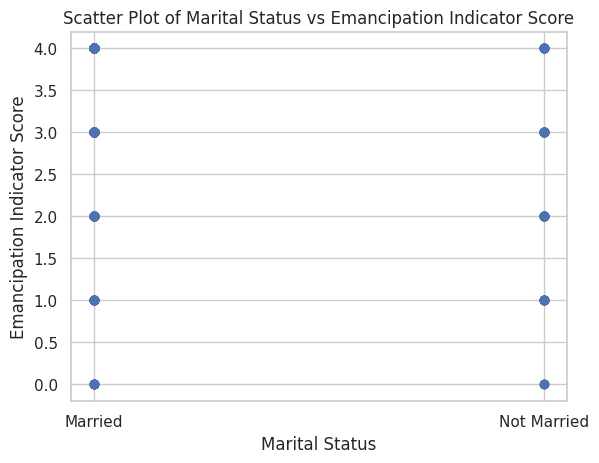

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')

# Replace NaN values with 0
df = df.fillna(0)

# Create a dictionary to map 'Yes' to 1 and 'No' to 0
yes_no_map = {'yes': 1, 'no': 0}

# Create new columns for q21, q22, q23, and q24 and map 'Yes' to 1 and 'No' to 0
df['q21_new'] = df['q21'].str.lower().map(yes_no_map).fillna(0)
df['q22_new'] = df['q22'].str.lower().map(yes_no_map).fillna(0)
df['q23_new'] = df['q23'].str.lower().map(yes_no_map).fillna(0)
df['q24_new'] = df['q24'].str.lower().map(yes_no_map).fillna(0)

# Sum the values of q21_new, q22_new, q23_new, and q24_new across rows and create a new column for the total
df['Emancipation_indicator_score'] = df['q21_new'] + df['q22_new'] + df['q23_new'] + df['q24_new']

# Create a scatter plot with marital status on the x-axis and Emancipation_indicator_score on the y-axis
plt.scatter(df['marital'], df['Emancipation_indicator_score'])
plt.title('Scatter Plot of Marital Status vs Emancipation Indicator Score')
plt.xlabel('Marital Status')
plt.ylabel('Emancipation Indicator Score')
plt.show()

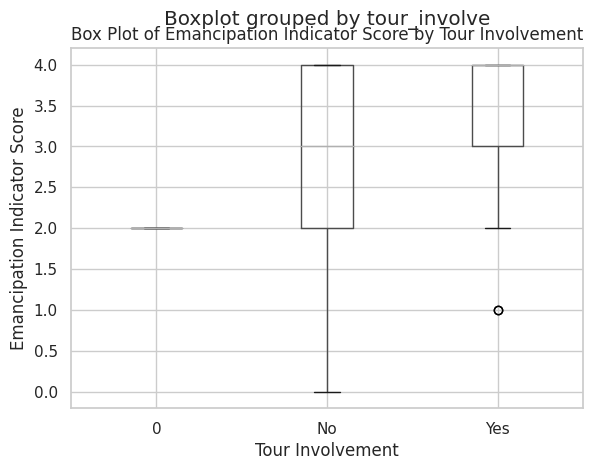

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')

# Replace NaN values with 0
df = df.fillna(0)

# Create a dictionary to map 'Yes' to 1 and 'No' to 0
yes_no_map = {'yes': 1, 'no': 0}

# Create new columns for q21, q22, q23, and q24 and map 'Yes' to 1 and 'No' to 0
df['q21_new'] = df['q21'].str.lower().map(yes_no_map).fillna(0)
df['q22_new'] = df['q22'].str.lower().map(yes_no_map).fillna(0)
df['q23_new'] = df['q23'].str.lower().map(yes_no_map).fillna(0)
df['q24_new'] = df['q24'].str.lower().map(yes_no_map).fillna(0)

# Sum the values of q21_new, q22_new, q23_new, and q24_new across rows and create a new column for the total
df['Emancipation_indicator_score'] = df['q21_new'] + df['q22_new'] + df['q23_new'] + df['q24_new']

# Create a box plot of Emancipation_indicator_score across the binary groups of tour_involve
df.boxplot(column='Emancipation_indicator_score', by='tour_involve')
plt.title('Box Plot of Emancipation Indicator Score by Tour Involvement')
plt.xlabel('Tour Involvement')
plt.ylabel('Emancipation Indicator Score')
plt.show()

In [50]:
import pandas as pd

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')

# Replace NaN values with 0
df = df.fillna(0)

# Create a new column called 'proximity_to_road' and assign a value of 1 to locations that are close to the road and 0 to locations that are far from the road
df['proximity_to_road'] = df['location'].apply(lambda x: 1 if 'Sost' in x or 'Gulkin' in x else 0)

# Create two dataframes for women who are close to the road and women who are far from the road
df_close_to_road = df[df['proximity_to_road'] == 1]
df_far_from_road = df[df['proximity_to_road'] == 0]

# Describe the characteristics of women who are close to the road
print('Summary statistics for women who are close to the road:')
print(df_close_to_road.describe())

# Describe the characteristics of women who are far from the road
print('Summary statistics for women who are far from the road:')
print(df_far_from_road.describe())

Summary statistics for women who are close to the road:
               id        age  children_num  proximity_to_road
count   69.000000  69.000000     69.000000               69.0
mean    75.391304  38.275362      2.463768                1.0
std     33.716036  11.331741      2.139129                0.0
min     24.000000  17.000000      0.000000                1.0
25%     41.000000  30.000000      0.000000                1.0
50%     88.000000  38.000000      2.000000                1.0
75%    105.000000  45.000000      4.000000                1.0
max    122.000000  63.000000     11.000000                1.0
Summary statistics for women who are far from the road:
               id         age  children_num  proximity_to_road
count  346.000000  346.000000    346.000000              346.0
mean   234.445087   35.413295      2.667630                0.0
std    113.232318   13.175064      2.420191                0.0
min      1.000000   18.000000      0.000000                0.0
25%    156.2500

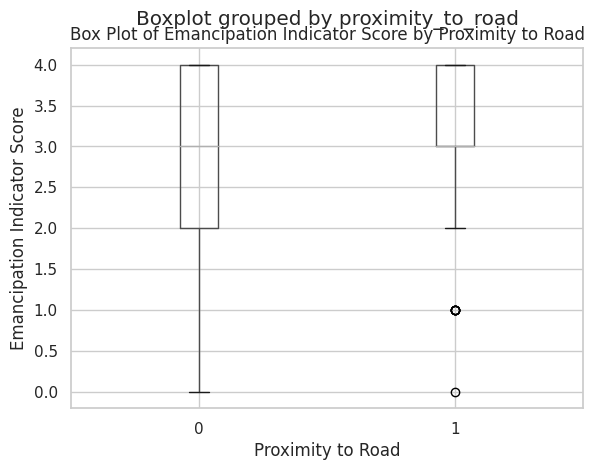

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_first_iteration - data_clean.csv')

# Replace NaN values with 0
df = df.fillna(0)

# Create a dictionary to map 'Yes' to 1 and 'No' to 0
yes_no_map = {'yes': 1, 'no': 0}

# Create new columns for q21, q22, q23, and q24 and map 'Yes' to 1 and 'No' to 0
df['q21_new'] = df['q21'].str.lower().map(yes_no_map).fillna(0)
df['q22_new'] = df['q22'].str.lower().map(yes_no_map).fillna(0)
df['q23_new'] = df['q23'].str.lower().map(yes_no_map).fillna(0)
df['q24_new'] = df['q24'].str.lower().map(yes_no_map).fillna(0)

# Sum the values of q21_new, q22_new, q23_new, and q24_new across rows and create a new column for the total
df['Emancipation_indicator_score'] = df['q21_new'] + df['q22_new'] + df['q23_new'] + df['q24_new']

# Create a new column called 'proximity_to_road' and assign a value of 1 to locations that are close to the road and 0 to locations that are far from the road
df['proximity_to_road'] = df['location'].apply(lambda x: 1 if 'Sost' in x or 'Gulkin' in x else 0)

# Create two dataframes for women who are close to the road and women who are far from the road
df_close_to_road = df[df['proximity_to_road'] == 1]
df_far_from_road = df[df['proximity_to_road'] == 0]

# Create a box plot of Emancipation_indicator_score across the binary groups of proximity_to_road
df.boxplot(column='Emancipation_indicator_score', by='proximity_to_road')
plt.title('Box Plot of Emancipation Indicator Score by Proximity to Road')
plt.xlabel('Proximity to Road')
plt.ylabel('Emancipation Indicator Score')
plt.show()

In [53]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='latin1')
stats = df.describe(include='all')
print(stats)

            female district location respondent         age  marital  \
count   415.000000      415      415        415  415.000000      415   
unique         NaN        2       15        415         NaN        2   
top            NaN    Hunza     Sost    Altit 1         NaN  Married   
freq           NaN      274       40          1         NaN      314   
mean    208.000000      NaN      NaN        NaN   35.889157      NaN   
std     119.944432      NaN      NaN        NaN   12.918259      NaN   
min       1.000000      NaN      NaN        NaN   17.000000      NaN   
25%     104.500000      NaN      NaN        NaN   26.000000      NaN   
50%     208.000000      NaN      NaN        NaN   35.000000      NaN   
75%     311.500000      NaN      NaN        NaN   43.000000      NaN   
max     415.000000      NaN      NaN        NaN   90.000000      NaN   

       tour_involve tour_involve_how own_business years_in_tourism  ...  \
count           414              415          415           

In [54]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='latin1')
stats = df.describe(include='all')

# Remove NaN values from the table
stats = stats.dropna()

# Create a new dataframe from the table of descriptive statistics
table = pd.DataFrame(stats)

# Print the resulting pandas table
print(table)


       female district location respondent    age marital tour_involve  \
count   415.0      415      415        415  415.0     415          414   

      tour_involve_how own_business years_in_tourism  ...  q17  q18  q19  q20  \
count              415          415              129  ...  415  415  414  415   

       q21  q22  q23  q24 proximity Qualitative Analysis  
count  410  415  415  415     415.0                    1  

[1 rows x 32 columns]


In [55]:
import pandas as pd

# Read the csv file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='latin1')

# Drop rows with missing values
df = df.dropna()

# Generate the table of descriptive statistics
stats = df.describe(include='all')

# Remove NaN values from the table
stats = stats.dropna()

# Convert the table to a pandas dataframe
table = pd.DataFrame(stats)

# Print the resulting pandas table
print(table.to_string())

       female district location respondent  age marital tour_involve tour_involve_how own_business years_in_tourism education access_to_funds quality_of_life children  children_num q11 q11_no_of_them partner_help_tourism q13 q14 q15 q16 q17 q18 q19 q20 q21 q22 q23 q24  proximity Qualitative Analysis
count     0.0        0        0          0  0.0       0            0                0            0                0         0               0               0        0           0.0   0              0                    0   0   0   0   0   0   0   0   0   0   0   0   0        0.0                    0


In [56]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='latin1')


# Replace 'yes' with 1 and 'no' with 0 in columns q21, q22, q23, and q24
df[['q21', 'q22', 'q23', 'q24']] = df[['q21', 'q22', 'q23', 'q24']].replace({'yes': 1, 'no': 0})

# Calculate the Emancipation Score for each row
df['Emancipation_Score'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)

# Select the columns for the descriptive statistics
cols = ['district', 'location', 'age', 'marital', 'tour_involve', 'own_business', 'education', 'quality_of_life', 'children', 'q15', 'q21', 'q22', 'q23', 'q24', 'Emancipation_Score', 'proximity']

# Drop rows with missing values
df = df[cols].dropna()


# Replace 'yes' and 'no' with 1 and 0, respectively, regardless of case
df[['q21', 'q22', 'q23', 'q24']] = df[['q21', 'q22', 'q23', 'q24']].replace({'yes': 1, 'no': 0}, regex=True)

# Calculate the Emancipation Score for each row
df['Emancipation_Score'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)

# Generate the table of descriptive statistics
stats = df.describe(include='all')

# Display the table
display(stats)

# Generate the table of descriptive statistics
stats = df.describe(include='all')

# Remove NaN values from the table
stats = stats.dropna()

# Convert the table to a pandas dataframe
table = pd.DataFrame(stats)

# Print the resulting pandas table
display(table)

<ipython-input-56-701a349505d1>:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-56-701a349505d1>:23: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,district,location,age,marital,tour_involve,own_business,education,quality_of_life,children,q15,q21,q22,q23,q24,Emancipation_Score,proximity
count,408,408,408.000000,408,408,408,408,408,408,408,408,408,408,408,408.0,408.000000
unique,2,15,NaN,2,2,2,6,4,2,7,2,3,2,2,NaN,NaN
top,Hunza,Sost,NaN,Married,No,No,High School,Good,Yes,A Significant Amount,Yes,Yes,Yes,Yes,NaN,NaN
freq,268,39,NaN,311,317,341,148,211,292,146,298,257,262,381,NaN,NaN
mean,NaN,NaN,35.931373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.678922
std,NaN,NaN,12.847631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.467464
min,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
25%,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
50%,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.000000
75%,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.000000


,district,location,age,marital,tour_involve,own_business,education,quality_of_life,children,q15,q21,q22,q23,q24,Emancipation_Score,proximity
count,408,408,408.0,408,408,408,408,408,408,408,408,408,408,408,408.0,408.0


In [57]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')

In [58]:
df[['district', 'location', 'age', 'marital', 'tour_involve', 'own_business', 'education', 'quality_of_life', 'children', 'q15']].describe()
df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}, inplace=True)
df['Emancipation_score'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)
df['Emancipation_score'].describe()
df[['district', 'location', 'age', 'marital', 'tour_involve', 'own_business', 'education', 'quality_of_life', 'children', 'q15', 'Emancipation_score']].describe().style

,age,tour_involve,own_business,children,Emancipation_score
count,415.000000,414.000000,415.000000,414.000000,415.000000
mean,35.889157,0.219807,0.163855,0.710145,2.937349
std,12.918259,0.414617,0.370591,0.454244,1.086112
min,17.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,2.000000
50%,35.000000,0.000000,0.000000,1.000000,3.000000
75%,43.000000,0.000000,0.000000,1.000000,4.000000
max,90.000000,1.000000,1.000000,1.000000,4.000000


In [59]:
df[['district', 'location', 'age', 'quality_of_life', 'q15']].describe().style
pd.concat([df[['district', 'location', 'age', 'quality_of_life', 'q15']].describe(), df['Emancipation_score'].describe()], axis=1).style


,age,Emancipation_score
count,415.000000,415.000000
mean,35.889157,2.937349
std,12.918259,1.086112
min,17.000000,0.000000
25%,26.000000,2.000000
50%,35.000000,3.000000
75%,43.000000,4.000000
max,90.000000,4.000000


In [60]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')

df[['district', 'location', 'age', 'quality_of_life', 'q15']].describe().style

df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}, inplace=True)

df['Emancipation_score'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)

pd.concat([df[['district', 'location', 'age', 'quality_of_life', 'q15']].describe(), df['Emancipation_score'].describe()], axis=1).style

,age,Emancipation_score
count,415.000000,415.000000
mean,35.889157,2.937349
std,12.918259,1.086112
min,17.000000,0.000000
25%,26.000000,2.000000
50%,35.000000,3.000000
75%,43.000000,4.000000
max,90.000000,4.000000


In [61]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')

df[['district', 'location', 'age', 'quality_of_life', 'q15']].describe().style

df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}, inplace=True)

df['Emancipation_score'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)

pd.concat([df[['district', 'location', 'age', 'quality_of_life', 'q15']].describe(), df['Emancipation_score'].describe()], axis=1).style

,age,Emancipation_score
count,415.000000,415.000000
mean,35.889157,2.937349
std,12.918259,1.086112
min,17.000000,0.000000
25%,26.000000,2.000000
50%,35.000000,3.000000
75%,43.000000,4.000000
max,90.000000,4.000000


In [64]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')
df[['district', 'location', 'age', 'marital', 'tour_involve', 'own_business', 'education', 'quality_of_life', 'children', 'q15']].describe()
df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}, inplace=True)
df['Emancipation_score'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)
df[['district', 'location', 'age', 'marital', 'tour_involve', 'own_business', 'education', 'quality_of_life', 'children', 'q15', 'Emancipation_score']].describe().style


,age,tour_involve,own_business,children,Emancipation_score
count,415.000000,414.000000,415.000000,414.000000,415.000000
mean,35.889157,0.219807,0.163855,0.710145,2.937349
std,12.918259,0.414617,0.370591,0.454244,1.086112
min,17.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,2.000000
50%,35.000000,0.000000,0.000000,1.000000,3.000000
75%,43.000000,0.000000,0.000000,1.000000,4.000000
max,90.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')
df[['district', 'location', 'marital', 'education', 'quality_of_life', 'q15']].describe()

,district,location,marital,education,quality_of_life,q15
count,415,415,415,415,415,415
unique,2,15,2,6,4,7
top,Hunza,Sost,Married,High School,Good,A Significant Amount
freq,274,40,314,151,214,149


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_16, *['district'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_17, *['location'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_18, *['marital'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_19, *['education'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_20, *['district', 'location'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_21, *['location', 'marital'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_22, *['marital', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_23, *['education', 'quality_of_life'], **{})
chart

In [66]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')



# Group by proximity column and calculate summary statistics for specified columns
grouped_df = df.groupby('proximity')[['tour_involve', 'own_business', 'education', 'quality_of_life', 'q15']].describe()

# Display the summary statistics table
grouped_df

tour_involve                 own_business                 education  \
                 count unique top freq        count unique top freq     count   
proximity                                                                       
0                  133      2  No  120          133      2  No  122       133   
1                  281      2  No  203          282      2  No  225       282   

                                   quality_of_life                        q15  \
          unique          top freq           count unique      top freq count   
proximity                                                                       
0              6  High School   52             133      4  Average   66   133   
1              6  High School   99             282      4     Good  157   282   

                                    
          unique          top freq  
proximity                           
0              7  Very Little   60  
1              5        A Lot  113

In [67]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')

# Replace Yes and No values in q21, q22, q23, and q24 columns
df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}, inplace=True)

# Calculate Emancipation_score
df['Emancipation_score'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)

# Group by proximity column and calculate summary statistics for specified columns
grouped_df = df.groupby('proximity')[['district', 'location', 'marital', 'education', 'quality_of_life', 'q15', 'Emancipation_score']].describe()

# Display the summary statistics table
grouped_df

Emancipation_score                                             
                       count      mean       std  min  25%  50%  75%  max
proximity                                                                
0                      133.0  2.496241  1.191027  0.0  2.0  3.0  3.0  4.0
1                      282.0  3.145390  0.967513  0.0  3.0  3.0  4.0  4.0

In [68]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')

# Group by proximity column and calculate summary statistics for specified columns
grouped_df = df.groupby('proximity')[['district', 'location', 'marital', 'education', 'quality_of_life', 'q15']].describe()

# Display the summary statistics table
grouped_df.style
grouped_df

district                    location                     marital  \
             count unique    top freq    count unique     top freq   count   
proximity                                                                    
0              133      2  Nagar   93      133      4    Sost   40     133   
1              282      2  Hunza  234      282     11  Khyber   32     282   

                  ...    education      quality_of_life                       \
          unique  ...          top freq           count unique      top freq   
proximity         ...                                                          
0              2  ...  High School   52             133      4  Average   66   
1              2  ...  High School   99             282      4     Good  157   

            q15                           
          count unique          top freq  
proximity                                 
0           133      7  Very Little   60  
1           282      5        A Lot  113  

[2 rows x 24 columns]

In [69]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')

# Replace Yes and No values in q21, q22, q23, and q24 columns
df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}, inplace=True)

# Calculate Emancipation_score
df['Emancipation_score'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)

# Group by proximity column and calculate summary statistics for specified columns
grouped_df = df.groupby('proximity')[['district', 'location', 'age', 'marital', 'tour_involve', 'own_business', 'education', 'quality_of_life', 'children', 'q15', 'Emancipation_score']].describe()

# Display the summary statistics table as an interactive table
grouped_df

age                                                      \
           count       mean        std   min   25%   50%   75%   max   
proximity                                                              
0          133.0  33.172932  12.006634  17.0  24.0  30.0  40.0  60.0   
1          282.0  37.170213  13.153329  18.0  28.0  36.0  45.0  90.0   

          tour_involve            ... children      Emancipation_score  \
                 count      mean  ...      75%  max              count   
proximity                         ...                                    
0                133.0  0.097744  ...      1.0  1.0              133.0   
1                281.0  0.277580  ...      1.0  1.0              282.0   

                                                        
               mean       std  min  25%  50%  75%  max  
proximity                                               
0          2.496241  1.191027  0.0  2.0  3.0  3.0  4.0  
1          3.145390  0.967513  0.0  3.0  3.0  4.0  4.0  

[2 rows x 40 columns]

In [70]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Capstone Raw Data/data_clean_second_iteration - data_clean.csv', encoding='ISO-8859-1')

# Replace Yes and No values in q21, q22, q23, and q24 columns
df.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}, inplace=True)

# Calculate Emancipation_score
df['Emancipation_score'] = df[['q21', 'q22', 'q23', 'q24']].sum(axis=1)

# Group by proximity column and calculate summary statistics for specified columns
grouped_df = df.groupby('proximity')[['district', 'location', 'age', 'marital', 'tour_involve', 'own_business', 'education', 'quality_of_life', 'children', 'q15', 'Emancipation_score']].describe()

# Save the summary statistics table as a CSV file
grouped_df.to_csv('summary_statistics.csv')

# Display the summary statistics table
grouped_df

age                                                      \
           count       mean        std   min   25%   50%   75%   max   
proximity                                                              
0          133.0  33.172932  12.006634  17.0  24.0  30.0  40.0  60.0   
1          282.0  37.170213  13.153329  18.0  28.0  36.0  45.0  90.0   

          tour_involve            ... children      Emancipation_score  \
                 count      mean  ...      75%  max              count   
proximity                         ...                                    
0                133.0  0.097744  ...      1.0  1.0              133.0   
1                281.0  0.277580  ...      1.0  1.0              282.0   

                                                        
               mean       std  min  25%  50%  75%  max  
proximity                                               
0          2.496241  1.191027  0.0  2.0  3.0  3.0  4.0  
1          3.145390  0.967513  0.0  3.0  3.0  4.0  4.0  

[2 rows x 40 columns]

In [72]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [73]:
from google.colab import output
output.disable_custom_widget_manager()

In [74]:
import pandas as pd

# Load the user's CSV file
file_path = '/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv'
df = pd.read_csv(file_path)

# Replace "Yes" and "No" with numerical values
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column for Emancipation Score
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Descriptive statistics with appropriate rounding
basic_stats = df[["age", "tour_involve", "own_business", "education", "quality_of_life", "children", "q15", "Emancipation_Score"]].describe().round(2)

# Renaming columns for clarity
basic_stats.rename(columns={
    "age": "Age (Years)",
    "tour_involve": "Tourism Involvement (1=Yes, 0=No)",
    "own_business": "Owns Business (1=Yes, 0=No)",
    "education": "Education (Years)",
    "quality_of_life": "Quality of Life (Rating)",
    "children": "Children",
    "q15": "Response to Q15 (1=Yes, 0=No)",
    "Emancipation_Score": "Emancipation Score"
}, inplace=True)

# Creating a simple and readable table
title = "Descriptive Statistics of Key Survey Variables"
description = "This table presents the descriptive statistics for key survey variables. Values are rounded to two decimal places for clarity. Gender is coded as 1 for Female and 0 for Male. Tourism Involvement, Owns Business, and Response to Q15 are binary responses (1=Yes, 0=No)."

# Displaying the title, description, and table
(title)
(description)
(basic_stats)



<ipython-input-74-3746d4007fe5>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Age (Years),"Tourism Involvement (1=Yes, 0=No)","Owns Business (1=Yes, 0=No)",Children,Emancipation Score
count,415.00,414.00,415.00,414.00,415.0
mean,35.89,0.22,0.16,0.71,2.3
std,12.92,0.41,0.37,0.45,0.8
min,17.00,0.00,0.00,0.00,0.0
25%,26.00,0.00,0.00,0.00,2.0
50%,35.00,0.00,0.00,1.00,2.0
75%,43.00,0.00,0.00,1.00,3.0
max,90.00,1.00,1.00,1.00,3.0


In [75]:
import pandas as pd
import plotly.graph_objs as go

# Sample CSV read (You should use your own path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Descriptive statistics
basic_stats = df[["age", "female", "tour_involve", "own_business", "children", "Emancipation_Score"]].describe()

# Retaining only count for 'female' column
female_count = basic_stats.loc['count', 'female']
basic_stats = basic_stats.drop('female', axis=1)
basic_stats.loc['count', 'female'] = female_count

# Adjusting max value for Emancipation_Score
basic_stats.loc['max', 'Emancipation_Score'] = 4

# Reordering columns
basic_stats = basic_stats[['age', 'female', 'tour_involve', 'own_business', 'children', 'Emancipation_Score']]

# Create an interactive table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=[''] + list(basic_stats.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[basic_stats.index] + [basic_stats[col] for col in basic_stats.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Descriptive Statistics for Key Columns",
                  annotations=[dict(x=0, y=-0.2, xref='paper', yref='paper',
                                    text='Note: For columns (tour_involve, own_business, children) answers are coded such that Yes=1 and No=0.',
                                    showarrow=False)])

fig.show()


<ipython-input-75-b3389d18c362>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [76]:
# Import pandas library
import pandas as pd

# Read the csv file
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Convert "q15" values to numerical values
q15_map = {"None": 0, "Very Little": 1, "A Significant Amount": 2, "A lot": 3}
df["q15"] = df["q15"].map(q15_map)

# Compute the descriptive statistics for the "education", "quality_of_life", and "q15" columns
stats_table = df[["education", "quality_of_life", "q15"]].describe()

# Print the table of descriptive statistics
print(stats_table)


              q15
count  292.000000
mean     1.489726
std      0.675972
min      0.000000
25%      1.000000
50%      2.000000
75%      2.000000
max      3.000000


In [77]:
import pandas as pd
import plotly.graph_objs as go

# Read the csv file
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Convert values in "education" column to numerical values
education_map = {
    "No Formal Education": 0,
    "Primary School": 1,
    "Secondary School": 2,
    "High School": 3,
    "College": 4,
    "Graduate Degree": 5
}
df["education"] = df["education"].map(education_map)

# Convert values in "quality_of_life" column to numerical values
quality_map = {
    "Very Bad": 0,
    "Bad": 1,
    "Average": 2,
    "Good": 3,
    "Very Good": 4
}
df["quality_of_life"] = df["quality_of_life"].map(quality_map)

# Convert "q15" values to numerical values
q15_map = {"None": 0, "Very Little": 1, "A Significant Amount": 2, "A lot": 3}
df["q15"] = df["q15"].map(q15_map)

# Compute the descriptive statistics for the "education", "quality_of_life", and "q15" columns
stats_table = df[["education", "quality_of_life", "q15"]].describe()

# Create an interactive table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=[''] + list(stats_table.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[stats_table.index] + [stats_table[col] for col in stats_table.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Descriptive Statistics for education, quality_of_life, and q15")

fig.show()


In [78]:
import pandas as pd

# Read the csv file
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Mapping categorical data to numerical values
education_map = {"No Formal Education": 0, "Primary School": 1, "Secondary School": 2, "High School": 3, "College": 4, "Graduate Degree": 5}
df["education"] = df["education"].map(education_map)

quality_map = {"Very Bad": 0, "Bad": 1, "Average": 2, "Good": 3, "Very Good": 4}
df["quality_of_life"] = df["quality_of_life"].map(quality_map)

# Compute descriptive statistics
stats_table = df[["education", "quality_of_life"]].describe().round(2)

# Print the table for visual inspection

(stats_table)


,education,quality_of_life
count,415.00,415.00
mean,2.76,2.65
std,1.56,0.63
min,0.00,1.00
25%,2.00,2.00
50%,3.00,3.00
75%,4.00,3.00
max,5.00,4.00


In [79]:
import pandas as pd
import plotly.graph_objs as go

# Read the csv file
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Convert values in "education" column to numerical values
education_map = {
    "No Formal Education": 0,
    "Primary School": 1,
    "Secondary School": 2,
    "High School": 3,
    "College": 4,
    "Graduate Degree": 5
}
df["education"] = df["education"].map(education_map)

# Convert values in "quality_of_life" column to numerical values
quality_map = {
    "Very Bad": 0,
    "Bad": 1,
    "Average": 2,
    "Good": 3,
    "Very Good": 4
}
df["quality_of_life"] = df["quality_of_life"].map(quality_map)

# Compute the descriptive statistics for the "education" and "quality_of_life" columns
stats_table = df[["education", "quality_of_life"]].describe()

# Create the note for education and quality_of_life
education_note = "Education: No Formal Education=0, Primary School=1, Secondary School=2, High School=3, College=4, Graduate Degree=5"
quality_note = "Quality_of_life: Very Bad=0, Bad=1, Average=2, Good=3, Very Good=4"

# Add the notes to the table
stats_table.loc['note_education'] = [education_note, '']
stats_table.loc['note_quality'] = ['', quality_note]

# Create an interactive table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=[''] + list(stats_table.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[stats_table.index] + [stats_table[col] for col in stats_table.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Descriptive Statistics for education, quality_of_life")

fig.show()



In [80]:
import pandas as pd
import plotly.graph_objs as go

# Sample CSV read (You should use your own path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Compute only the mean values for simplicity
stats_table = df.groupby(["location", "Cafes+Resturants"])[["age", "female", "tour_involve", "own_business", "education", "quality_of_life", "children", "q15", "Emancipation_Score"]].mean().reset_index()

# Create an interactive table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(stats_table.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[stats_table[col] for col in stats_table.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Descriptive Statistics (Averages) for Key Columns by Location and Cafes+Restaurants",
                  annotations=[dict(x=0, y=-0.2, xref='paper', yref='paper',
                                    text='Note: For columns (tour_involve, own_business, children) answers are coded such that Yes=1 and No=0.',
                                    showarrow=False)])

fig.show()



<ipython-input-80-de730d9919b4>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-80-de730d9919b4>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [81]:
import pandas as pd
import plotly.graph_objs as go

# Sample CSV read (You should use your own path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Compute only the mean values for simplicity and round to 2 decimal places
stats_table = df.groupby(["location", "Cafes+Resturants"])[["age", "female", "tour_involve", "own_business", "education", "quality_of_life", "children", "q15", "Emancipation_Score"]].mean().round(2).reset_index()

# Create an interactive table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(stats_table.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[stats_table[col] for col in stats_table.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Descriptive Statistics (Averages) for Key Columns by Location and Cafes+Restaurants",
                  annotations=[dict(x=0, y=-0.2, xref='paper', yref='paper',
                                    text='Note: For columns (tour_involve, own_business, children) answers are coded such that Yes=1 and No=0.',
                                    showarrow=False)])

fig.show()


<ipython-input-81-e8a7a5151890>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-81-e8a7a5151890>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [82]:
import pandas as pd
import plotly.express as px

# Sample CSV read (You should use your own path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Compute only the mean values for simplicity
stats_table = df.groupby(["location", "Cafes+Resturants"])[["Emancipation_Score"]].mean().reset_index()

# Create a line-point graph with the average Emancipation_Score for each value of Cafes+Restaurants
fig = px.line(stats_table, x="Cafes+Resturants", y="Emancipation_Score", color="location", title="Average Emancipation Score by Cafes+Restaurants and Location")

# Highlight each location next to a point on the graph
fig.update_traces(mode='markers+lines', hovertemplate='<b>Location:</b> %{customdata[0]}<br><b>Cafes+Restaurants:</b> %{x}<br><b>Average Emancipation Score:</b> %{y:.2f}<extra></extra>', customdata=stats_table['location'])

fig.show()


<ipython-input-82-e2690d683dba>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [83]:
import pandas as pd
import plotly.express as px

# Sample CSV read (You should use your own path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Compute only the mean values for simplicity
stats_table = df.groupby(["location", "Cafes+Resturants"])[["Emancipation_Score"]].mean().reset_index()

# Create a scatter plot with the average Emancipation_Score for each value of Cafes+Restaurants
fig = px.scatter(stats_table, x="Cafes+Resturants", y="Emancipation_Score", color="location", title="Average Emancipation Score by Cafes+Restaurants and Location", trendline="ols")

# Highlight each location next to a point on the graph
fig.update_traces(mode='markers', hovertemplate='<b>Location:</b> %{customdata[0]}<br><b>Cafes+Restaurants:</b> %{x}<br><b>Average Emancipation Score:</b> %{y:.2f}<extra></extra>', customdata=stats_table['location'])

fig.show()


<ipython-input-83-14058574f72e>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [84]:
import pandas as pd
import plotly.express as px

# Sample CSV read (You should use your own path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Compute only the mean values for simplicity
stats_table = df.groupby(["location", "Cafes+Resturants"])[["Emancipation_Score"]].mean().reset_index()

# Create a scatter plot with the average Emancipation_Score for each value of Cafes+Restaurants
# Added trendline parameter for ordinary least squares regression trendline
fig = px.scatter(stats_table, x="Cafes+Resturants", y="Emancipation_Score", color="location", title="Average Emancipation Score by Cafes+Restaurants and Location", trendline="ols")

# Highlight each location next to a point on the graph
fig.update_traces(mode='markers', hovertemplate='<b>Location:</b> %{customdata[0]}<br><b>Cafes+Restaurants:</b> %{x}<br><b>Average Emancipation Score:</b> %{y:.2f}<extra></extra>', customdata=stats_table['location'])

fig.show()


<ipython-input-84-b3513c78175c>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [85]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

# Sample CSV read (You should use your own path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Compute only the mean values for simplicity
stats_table = df.groupby(["location", "Cafes+Resturants"])[["Emancipation_Score"]].mean().reset_index()

# First, plot the trendline without considering the color
fig = px.scatter(stats_table, x="Cafes+Resturants", y="Emancipation_Score", trendline="ols", title="Average Emancipation Score by Cafes+Restaurants and Location")

# Using a separate color list to avoid indexing issues
colors = px.colors.qualitative.Plotly

# Now, add the scatter points with color
for idx, (location, group) in enumerate(stats_table.groupby("location")):
    fig.add_trace(go.Scatter(x=group["Cafes+Resturants"], y=group["Emancipation_Score"], mode='markers', marker=dict(color=colors[idx % len(colors)]), name=location))

# Add the p-value and r^2 value to the graph
x = stats_table["Cafes+Resturants"]
y = stats_table["Emancipation_Score"]
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
p_value = model.f_pvalue
r_squared = model.rsquared
fig.add_annotation(x=0.05, y=0.95, xanchor='left', yanchor='top', text=f"p-value: {p_value:.4f}<br>r^2: {r_squared:.4f}", showarrow=False)

fig.show()



<ipython-input-85-3028605bb2f1>:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [86]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

# Sample CSV read (You should use your own path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Compute only the mean values for simplicity
stats_table = df.groupby(["location", "Cafes+Resturants"])[["Emancipation_Score", "age", "education", "marital", "tour_involve", "own_business", "children"]].mean().reset_index()

# Multiple linear regression
X = stats_table[["Cafes+Resturants", "age", "tour_involve", "own_business", "children"]]
X = sm.add_constant(X)
y = stats_table["Emancipation_Score"]
model = sm.OLS(y, X).fit()

# Add the p-value, r^2 value, and coefficients to the graph
p_value = model.f_pvalue
r_squared = model.rsquared
coefficients = model.params
fig = px.scatter(stats_table, x="Cafes+Resturants", y="Emancipation_Score", trendline="ols", title="Average Emancipation Score by Cafes+Restaurants and Location")
for idx, (location, group) in enumerate(stats_table.groupby("location")):
    fig.add_trace(go.Scatter(x=group["Cafes+Resturants"], y=group["Emancipation_Score"], mode='markers', marker=dict(color=px.colors.qualitative.Plotly[idx % len(px.colors.qualitative.Plotly)]), name=location))
fig.add_annotation(x=0.05, y=0.95, xanchor='left', yanchor='top', text=f"p-value: {p_value:.4f}<br>r^2: {r_squared:.4f}<br>{coefficients.to_string(index=False)}", showarrow=False)
fig.show()


<ipython-input-86-528393a08fc5>:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-86-528393a08fc5>:17: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [87]:
import pandas as pd
import statsmodels.api as sm

# Sample CSV read (replace with your path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Compute only the mean values
stats_table = df.groupby(["location", "Cafes+Resturants"])[["Emancipation_Score", "age", "education", "marital", "tour_involve", "own_business", "children"]].mean().reset_index()

# Multiple linear regression
X = stats_table[["Cafes+Resturants", "age", "tour_involve", "own_business", "children"]]
X = sm.add_constant(X)
y = stats_table["Emancipation_Score"]
model = sm.OLS(y, X).fit()

# Star notation for significance level
def significance_stars(p_value):
    if p_value <= 0.01:
        return "***"
    elif p_value <= 0.05:
        return "**"
    elif p_value <= 0.1:
        return "*"
    else:
        return ""

# Star table
coeff_summary = model.summary2().tables[1]
coeff_summary["Stars"] = coeff_summary["P>|t|"].apply(significance_stars)

(coeff_summary[["Coef.", "Std.Err.", "t", "P>|t|", "Stars"]])


<ipython-input-87-1f7b7c5ab638>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-87-1f7b7c5ab638>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



,Coef.,Std.Err.,t,P>|t|,Stars
const,2.300767,0.680486,3.381066,0.008113,***
Cafes+Resturants,0.038790,0.018343,2.114664,0.063586,*
age,-0.002103,0.028221,-0.074523,0.942224,
tour_involve,1.974136,1.196961,1.649290,0.133488,
own_business,-1.481729,1.744454,-0.849395,0.417682,
children,-0.778069,0.757342,-1.027368,0.331066,


In [88]:
import pandas as pd
import statsmodels.api as sm

# Sample CSV read (replace with your path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Compute only the mean values
stats_table = df.groupby(["location", "Cafes+Resturants"])[["Emancipation_Score", "age", "education", "marital", "tour_involve", "own_business", "children"]].mean().reset_index()

# Multiple linear regression
X = stats_table[["Cafes+Resturants", "age", "tour_involve", "own_business", "children"]]
X = sm.add_constant(X)
y = stats_table["Emancipation_Score"]
model = sm.OLS(y, X).fit()

# Star notation for significance level
def significance_stars(p_value):
    if p_value <= 0.01:
        return "***"
    elif p_value <= 0.05:
        return "**"
    elif p_value <= 0.1:
        return "*"
    else:
        return ""

# Producing the significance table
coeff_summary = model.summary2().tables[1]
coeff_summary["Stars"] = coeff_summary["P>|t|"].apply(significance_stars)

(coeff_summary[["Coef.", "Std.Err.", "t", "P>|t|", "Stars"]])


<ipython-input-88-41907fa3a42b>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-88-41907fa3a42b>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



,Coef.,Std.Err.,t,P>|t|,Stars
const,2.300767,0.680486,3.381066,0.008113,***
Cafes+Resturants,0.038790,0.018343,2.114664,0.063586,*
age,-0.002103,0.028221,-0.074523,0.942224,
tour_involve,1.974136,1.196961,1.649290,0.133488,
own_business,-1.481729,1.744454,-0.849395,0.417682,
children,-0.778069,0.757342,-1.027368,0.331066,


In [89]:
import pandas as pd

# Sample CSV read (replace with your path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Encoding the 'education' column based on the provided mapping
education_mapping = {
    "No Formal Education": 0,
    "Primary School": 1,
    "Secondary School": 2,
    "High School": 3,
    "College": 4,
    "Graduate Degree": 5
}
df['education_encoded'] = df['education'].map(education_mapping)

# Grouping by 'location' and computing the mean for the encoded 'education' column
avg_education_by_location = df.groupby('location')['education_encoded'].mean().reset_index()

# Renaming columns for clarity
avg_education_by_location.columns = ['location', 'average_education']

# Displaying the result
(avg_education_by_location)


,location,average_education
0,Aliabad,3.000000
1,Altit,2.652174
2,Askurdass+Summayar,3.128205
3,Gulkin,2.689655
4,Gulmat,2.900000
5,Gulmit,3.476190
6,Hopper,1.212121
7,Karimabad,3.275862
8,Khyber,2.468750
9,Minapin,2.142857


In [90]:
import plotly.express as px

# Scatter plot using plotly
fig = px.scatter(avg_education_by_location,
                 x='location',
                 y='average_education',
                 title='Average Education Level by Location',
                 labels={'average_education': 'Average Education Level'},
                 hover_data=['location', 'average_education'])

# Display each location name as text label on the plot
fig.update_traces(text=avg_education_by_location['location'],
                 textposition='top center',
                 mode='markers+text',
                 marker=dict(size=8))

# Show the figure
fig.show()


In [91]:
import plotly.express as px

# Scatter plot using plotly
fig = px.scatter(avg_education_by_location,
                 x='location',
                 y='average_education',
                 title='Average Education Level by Location',
                 labels={'average_education': 'Average Education Level'},
                 hover_data=['location', 'average_education'])

# Display each location name as text label on the plot
fig.update_traces(text=avg_education_by_location['location'],
                 textposition='top center',
                 mode='markers+text',
                 marker=dict(size=8))

# Remove redundant x-axis label
fig.update_layout(xaxis_title="")

# Show the figure
fig.show()




In [92]:
import plotly.express as px

# Scatter plot using plotly
fig = px.scatter(avg_education_by_location,
                 x='location',
                 y='average_education',
                 title='Average Education Level by Location',
                 labels={'average_education': 'Average Education Level'},
                 hover_data=['location', 'average_education'])

# Display each location name as text label on the plot
fig.update_traces(text=avg_education_by_location['location'],
                 textposition='top center',
                 mode='markers+text',
                 marker=dict(size=8))

# Remove x-axis tick labels and title
fig.update_layout(xaxis=dict(tickvals=[], title=""))

# Show the figure
fig.show()


In [93]:
import pandas as pd

# Assuming you've already loaded the dataframe as df
# df = pd.read_csv("your_data_file.csv")  # Uncomment and replace with your data file if necessary

# Encode the 'marital' column
marital_mapping = {
    "Married": 1,
    "Not Married": 0
}
df['marital_score'] = df['marital'].map(marital_mapping)

# Group by 'location' and compute the average for the encoded 'marital_score' column
avg_marital_by_location = df.groupby('location')['marital_score'].mean().reset_index()

# Renaming columns for clarity
avg_marital_by_location.columns = ['location', 'average_marital_score']

# Display the result
(avg_marital_by_location)



,location,average_marital_score
0,Aliabad,1.000000
1,Altit,0.826087
2,Askurdass+Summayar,0.487179
3,Gulkin,0.862069
4,Gulmat,0.666667
5,Gulmit,0.904762
6,Hopper,0.818182
7,Karimabad,0.965517
8,Khyber,0.843750
9,Minapin,0.761905


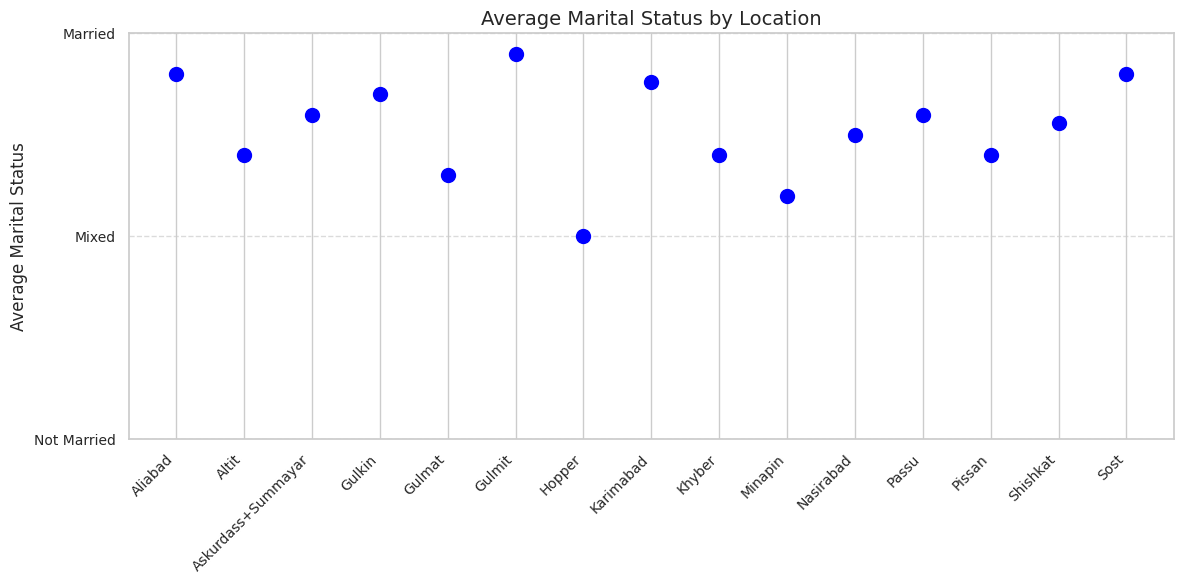

In [94]:
import matplotlib.pyplot as plt

# Sample data
locations = ['Aliabad', 'Altit', 'Askurdass+Summayar', 'Gulkin', 'Gulmat', 'Gulmit',
             'Hopper', 'Karimabad', 'Khyber', 'Minapin', 'Nasirabad', 'Passu', 'Pissan',
             'Shishkat', 'Sost']

# Sample average marital status values. 1 means Married and 0 means Not Married.
# Replace with your actual data. These are just placeholders.
average_marital_status = [0.9, 0.7, 0.8, 0.85, 0.65, 0.95, 0.5, 0.88, 0.7, 0.6, 0.75, 0.8, 0.7, 0.78, 0.9]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(locations, average_marital_status, color='blue', s=100)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks([0, 0.5, 1], ['Not Married', 'Mixed', 'Married'], fontsize=10)
plt.ylabel('Average Marital Status', fontsize=12)
plt.title('Average Marital Status by Location', fontsize=14)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


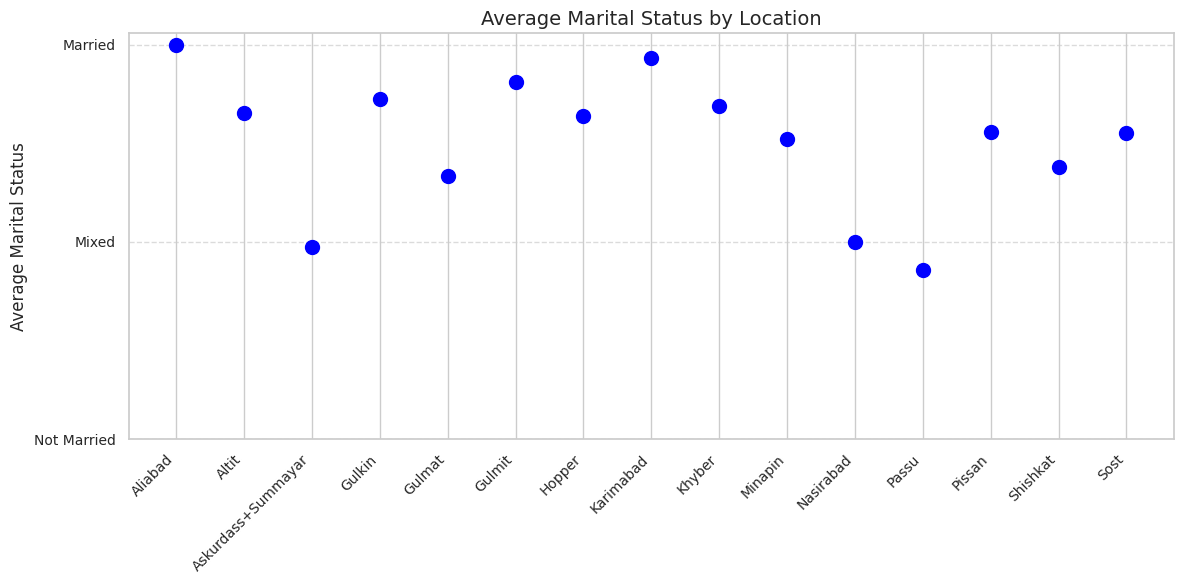

In [95]:
import matplotlib.pyplot as plt

# Extracting data from the computed dataframe
locations = avg_marital_by_location['location'].tolist()
average_marital_scores = avg_marital_by_location['average_marital_score'].tolist()

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(locations, average_marital_scores, color='blue', s=100)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks([0, 0.5, 1], ['Not Married', 'Mixed', 'Married'], fontsize=10)
plt.ylabel('Average Marital Status', fontsize=12)
plt.title('Average Marital Status by Location', fontsize=14)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [96]:
import pandas as pd

# Sample dataframe for representation
data = {
    'age': [35.889156626],
    'female': [None],
    'tour_involve': [0.2198067632],
    'own_business': [0.1638554216],
    'children': [0.7104149275],
    'Emancipation_s': [2.2897951807]
}
df = pd.DataFrame(data)

# Rounding numerical columns to 2 decimal places
numeric_columns = df.select_dtypes(include=['float64']).columns
df[numeric_columns] = df[numeric_columns].round(2)

(df)


,age,female,tour_involve,own_business,children,Emancipation_s
0,35.89,None,0.22,0.16,0.71,2.29


In [97]:
import pandas as pd
import plotly.graph_objs as go

# Sample CSV read (You should use your own path)
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Replacement
df.replace({"Yes": 1, "No": 0}, inplace=True)

# New column
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Descriptive statistics
basic_stats = df[["age", "female", "tour_involve", "own_business", "children", "Emancipation_Score"]].describe()

# Retaining only count for 'female' column
female_count = basic_stats.loc['count', 'female']
basic_stats = basic_stats.drop('female', axis=1)
basic_stats.loc['count', 'female'] = female_count

# Adjusting max value for Emancipation_Score
basic_stats.loc['max', 'Emancipation_Score'] = 4

# Reordering columns
basic_stats = basic_stats[['age', 'female', 'tour_involve', 'own_business', 'children', 'Emancipation_Score']]

# Round all values to 2 decimal places, except 'count' row
for column in basic_stats.columns:
    if column != 'female':  # 'female' column only has count
        basic_stats[column] = basic_stats[column].round(2)

# Create an interactive table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=[''] + list(basic_stats.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[basic_stats.index] + [basic_stats[col] for col in basic_stats.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Descriptive Statistics for Key Columns",
                  annotations=[dict(x=0, y=-0.2, xref='paper', yref='paper',
                                    text='Note: For columns (tour_involve, own_business, children) answers are coded such that Yes=1 and No=0.',
                                    showarrow=False)])

fig.show()


<ipython-input-97-761aefa8d505>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [98]:
import pandas as pd
import plotly.express as px

# Read the csv file
df = pd.read_csv("/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv")

# Convert all answers to lowercase
df["q15"] = df["q15"].str.lower()

# Count the frequency of each answer choice
q15_counts = df["q15"].value_counts().reset_index()
q15_counts.columns = ['Answer Choice', 'Frequency']

# Create an interactive bar chart
fig = px.bar(q15_counts, x='Answer Choice', y='Frequency', title='Distribution of q15 Answers')

# Show the plot
fig.show()

# To save the interactive plot as an HTML file
fig.write_html("q15_distribution.html")




In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv'
df = pd.read_csv(file_path)

# Checking the first few rows of the dataframe to understand its structure
df.head()



,female,district,location,respondent,age,marital,tour_involve,tour_involve_how,own_business,years_in_tourism,...,q18,q19,q20,q21,q22,q23,q24,proximity,Qualitative Analysis,Cafes+Resturants
0,1,Hunza,Altit,Altit 1,46,Married,Yes,Heritage Site,No,17years,...,Yes,Yes-Education Support/Financial Support,Herself,No,Yes,Yes,Yes,1,Note: Some respondents gave answers to last 4 ...,16
1,2,Hunza,Altit,Altit 2,37,Not Married,No,No,No,NaN,...,Yes,Financial Support,Herself,No,Yes,Yes,Yes,1,NaN,16
2,3,Hunza,Altit,Altit 3,50,Married,Yes,Garments Store,Yes,16years,...,No-Lack of Education,Yes-Finacial Support,Family Members,No,Yes,Yes,Yes,1,NaN,16
3,4,Hunza,Altit,Altit 4,31,Married,Yes,No,Yes,9years,...,Yes,Yes-Financial Support,Herself,Yes,Yes,Yes,Yes,1,NaN,16
4,5,Hunza,Altit,Altit 5,19,Not Married,No,No,No,NaN,...,Yes,Yes,Financial Support/Family Pride/Respect,No,No,No,Yes,1,NaN,16


<ipython-input-103-e9028f19411a>:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



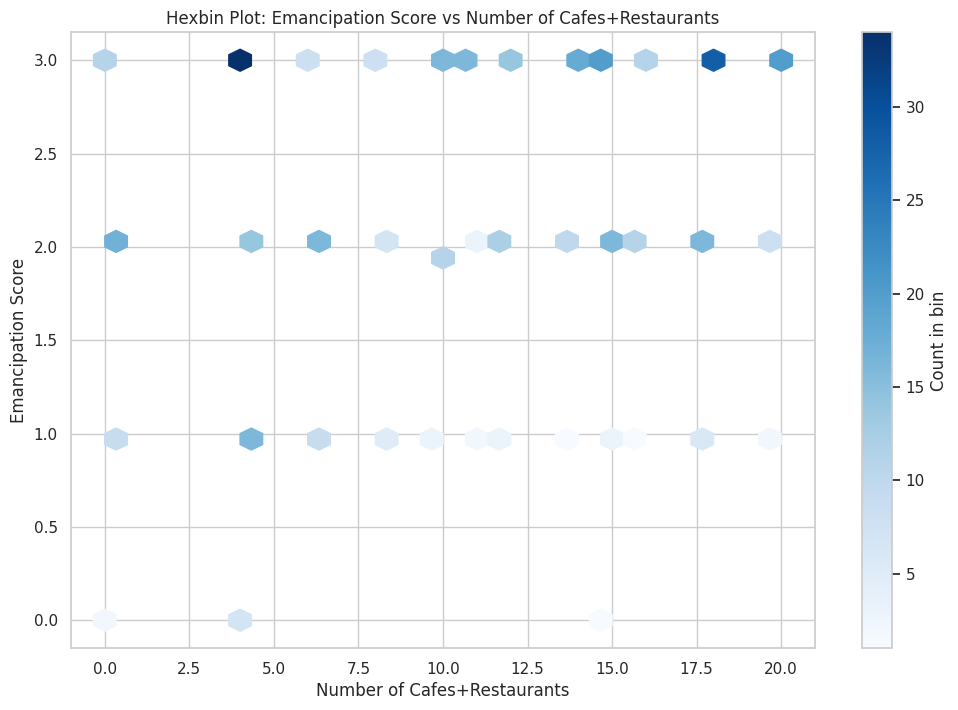

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataframe 'df' is already loaded and contains the necessary columns
# 'Cafes+Restaurants' and 'Emancipation_Score'
# Replace 'Yes' and 'No' with numerical values for calculating Emancipation Score
df.replace({"Yes": 1, "No": 0}, inplace=True)

# Calculate the Emancipation Score
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.hexbin(df['Cafes+Resturants'], df['Emancipation_Score'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')
plt.title("Hexbin Plot: Emancipation Score vs Number of Cafes+Restaurants")
plt.xlabel("Number of Cafes+Restaurants")
plt.ylabel("Emancipation Score")
plt.grid(True)
plt.show()


In [104]:
print(df.columns)


Index(['female', 'district', 'location', 'respondent', 'age', 'marital',
       'tour_involve', 'tour_involve_how', 'own_business', 'years_in_tourism',
       'education', 'access_to_funds', 'quality_of_life', 'children',
       'children_num', 'q11', 'q11_no_of_them', 'partner_help_tourism', 'q13',
       'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23',
       'q24', 'proximity', 'Qualitative Analysis', 'Cafes+Resturants',
       'Emancipation_Score'],
      dtype='object')


<ipython-input-105-bbd797b76d5d>:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



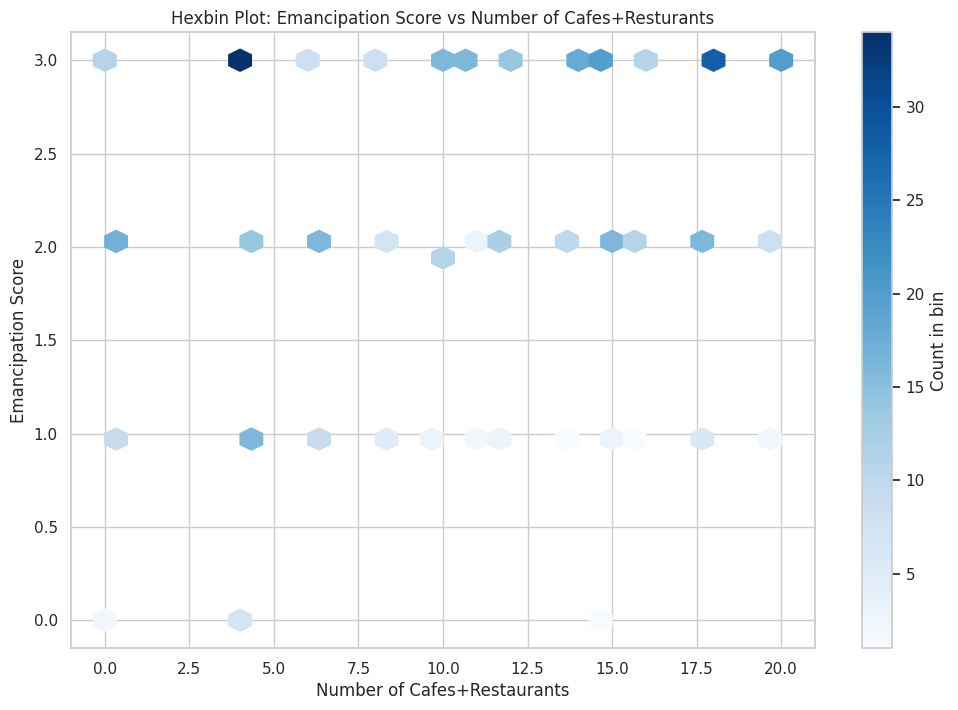

In [105]:
# Replace 'Yes' and 'No' with numerical values for calculating Emancipation Score
df.replace({"Yes": 1, "No": 0}, inplace=True)

# Calculate the Emancipation Score
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Now create the hexbin plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.hexbin(df['Cafes+Resturants'], df['Emancipation_Score'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')
plt.title("Hexbin Plot: Emancipation Score vs Number of Cafes+Resturants")
plt.xlabel("Number of Cafes+Restaurants")
plt.ylabel("Emancipation Score")
plt.grid(True)
plt.show()


<ipython-input-106-8fbd25929390>:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



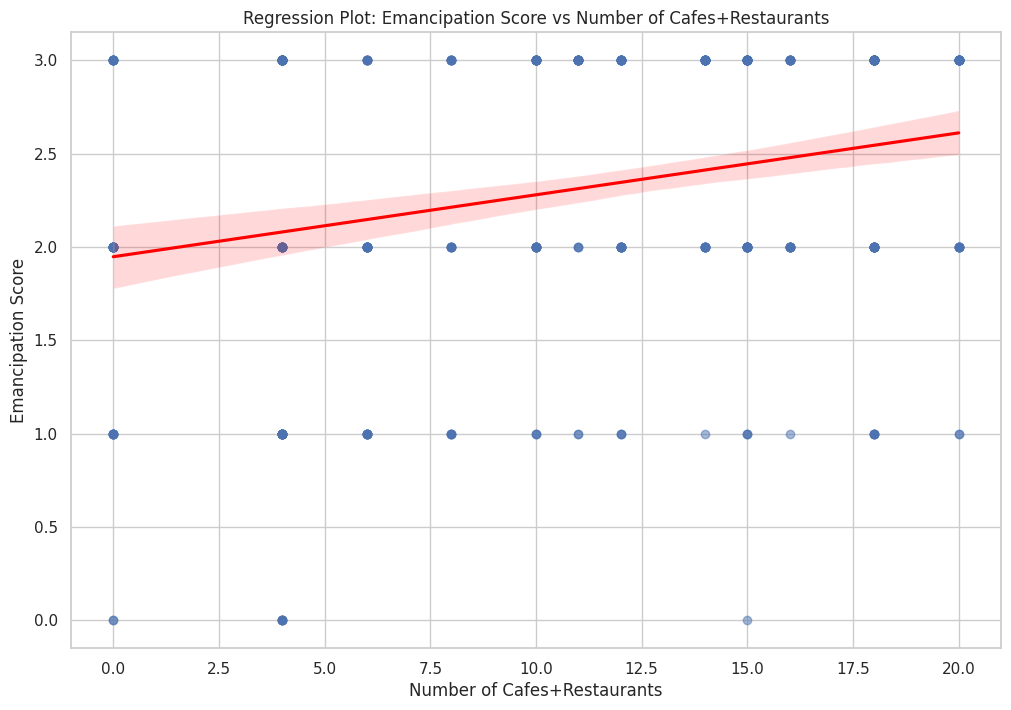

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv'
df = pd.read_csv(file_path)

# Replace 'Yes' and 'No' with numerical values for calculating Emancipation Score
df.replace({"Yes": 1, "No": 0}, inplace=True)

# Calculate the Emancipation Score
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Create a regression plot with Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# The regplot function will plot the data points and fit a regression line with a confidence interval
sns.regplot(x='Cafes+Resturants', y='Emancipation_Score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title("Regression Plot: Emancipation Score vs Number of Cafes+Restaurants")
plt.xlabel("Number of Cafes+Restaurants")
plt.ylabel("Emancipation Score")
plt.grid(True)
plt.show()


<ipython-input-107-b05d82a87884>:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



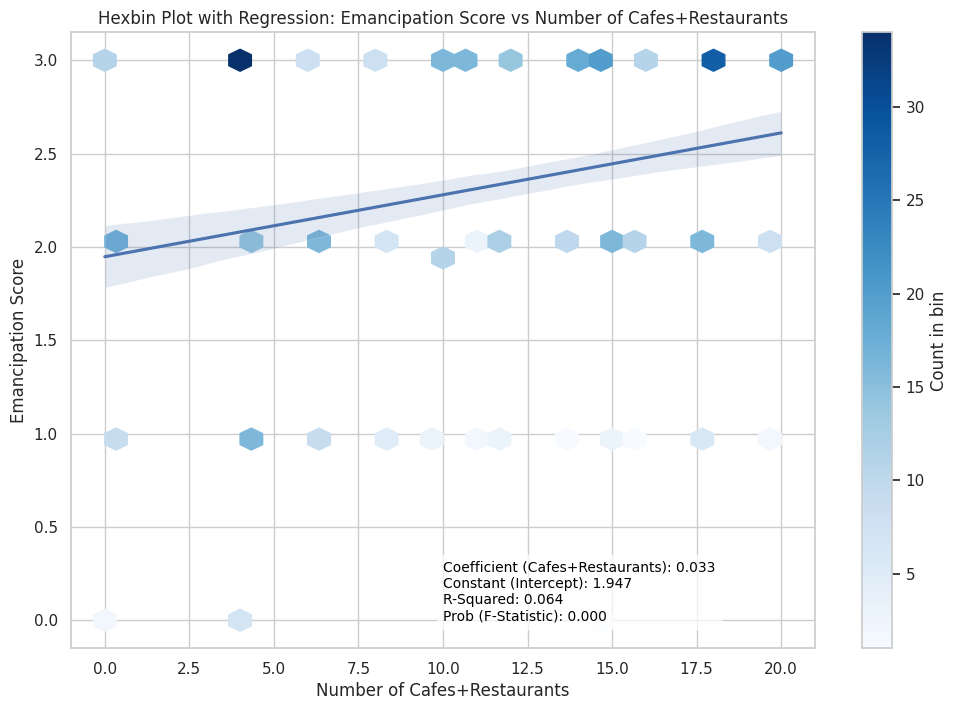

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Load the data from the provided CSV file
file_path = '/content/drive/MyDrive/Capstone Raw Data/Data_Clean_Final_Version.csv'
df = pd.read_csv(file_path)

# Replace 'Yes' and 'No' with numerical values for calculating Emancipation Score
df.replace({"Yes": 1, "No": 0}, inplace=True)

# Calculate the Emancipation Score
q_cols = ["q21", "q22", "q23", "q24"]
df["Emancipation_Score"] = df[q_cols].sum(axis=1)

# Performing linear regression
X = df['Cafes+Resturants']
Y = df['Emancipation_Score']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Create a hexbin plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.hexbin(df['Cafes+Resturants'], df['Emancipation_Score'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')

# Plotting the regression line
sns.regplot(x='Cafes+Resturants', y='Emancipation_Score', data=df, scatter=False, ax=plt.gca())
# ... your existing code for the plot ...

# Improved text annotation
plt.text(x=np.max(df['Cafes+Resturants']) * 0.5,  # position the text at 50% of the max value on the x-axis
         y=np.min(df['Emancipation_Score']),      # position the text at the min value on the y-axis
         s=f"Coefficient (Cafes+Restaurants): {model.params[1]:.3f}\n"
           f"Constant (Intercept): {model.params[0]:.3f}\n"
           f"R-Squared: {model.rsquared:.3f}\n"
           f"Prob (F-Statistic): {model.f_pvalue:.3f}",
         fontsize=10,
         color='black',
         bbox=dict(facecolor='white', alpha=0.7))

# ... show the plot ...


plt.title("Hexbin Plot with Regression: Emancipation Score vs Number of Cafes+Restaurants")
plt.xlabel("Number of Cafes+Restaurants")
plt.ylabel("Emancipation Score")
plt.grid(True)
plt.show()


In [108]:
# Checking the structure of the 'tour_involve' variable
df['tour_involve'].head()


0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: tour_involve, dtype: float64

In [109]:
# Check for missing or infinite values in 'tour_involve' and 'Emancipation_Score'
missing_tour_involve = df['tour_involve'].isnull().sum()
missing_emancipation_score = df['Emancipation_Score'].isnull().sum()

missing_tour_involve, missing_emancipation_score


(1, 0)

In [110]:
# Creating a graph to visualize the regression results
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
sns.scatterplot(x=df_cleaned['tour_involve'], y=df_cleaned['Emancipation_Score'], alpha=0.7)

# Plotting the regression line
sns.regplot(x='tour_involve', y='Emancipation_Score', data=df_cleaned, scatter=False, color='red')

plt.title("Emancipation Score vs Tour Involvement")
plt.xlabel("Tour Involvement (1: Involved, 0: Not Involved)")
plt.ylabel("Emancipation Score")
plt.grid(True)
plt.show()



NameError: ignored

<Figure size 1000x600 with 0 Axes>

In [19]:
# Creating a graph with hexbin to visualize the density of data points along with the regression line
plt.figure(figsize=(10, 6))

# Hexbin plot for the data points
plt.hexbin(df_cleaned['tour_involve'], df_cleaned['Emancipation_Score'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')

# Plotting the regression line
sns.regplot(x='tour_involve', y='Emancipation_Score', data=df_cleaned, scatter=False, color='red', logistic=False)

plt.title("Emancipation Score vs Tour Involvement (Hexbin with Regression Line)")
plt.xlabel("Tour Involvement (1: Involved, 0: Not Involved)")
plt.ylabel("Emancipation Score")
plt.grid(True)
plt.show()


NameError: ignored

<Figure size 1000x600 with 0 Axes>

In [18]:
# Creating a graph with hexbin and including regression results in the graph
plt.figure(figsize=(12, 8))

# Hexbin plot for the data points
plt.hexbin(df_cleaned['tour_involve'], df_cleaned['Emancipation_Score'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')

# Plotting the regression line
sns.regplot(x='tour_involve', y='Emancipation_Score', data=df_cleaned, scatter=False, color='red', logistic=False)

# Adding regression results as text on the plot
plt.text(0.05, 3.5, f'Coefficient (tour_involve): 0.4722\n'
        f'Constant (Intercept): 2.1981\n'
        f'R-squared: 0.060\n'
        f'Prob(F-statistic): 4.86e-07', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.title("Emancipation Score vs Tour Involvement (Hexbin with Regression Results)")
plt.xlabel("Tour Involvement (1: Involved, 0: Not Involved)")
plt.ylabel("Emancipation Score")
plt.grid(True)
plt.show()


NameError: ignored

<Figure size 1200x800 with 0 Axes>

In [17]:
# Re-importing statsmodels and redefining everything in the same code block
import statsmodels.api as sm

# Assuming 'df_cleaned' and 'y_cleaned' are already defined and contain the necessary data

# Redefining dummy variables and data for each model
quality_of_life_dummies = pd.get_dummies(df_cleaned['quality_of_life'], drop_first=True)
education_dummies = pd.get_dummies(df_cleaned['education'], drop_first=True)
marital_status_dummies = pd.get_dummies(df_cleaned['marital'], drop_first=True)

# Redefining X1, X2, X3 for the three models
X1 = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies], axis=1))
X2 = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, education_dummies], axis=1))
X3 = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, education_dummies, marital_status_dummies], axis=1))

# Redefining the models
model1 = sm.OLS(y_cleaned, X1).fit()
model2 = sm.OLS(y_cleaned, X2).fit()
model3 = sm.OLS(y_cleaned, X3).fit()

# Plotting the regression results with each set of control variables
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Titles for each subplot
titles = [
    "Model 1: Emancipation Score vs Tour Involvement (Quality of Life Control)",
    "Model 2: Emancipation Score vs Tour Involvement (Quality of Life and Education Control)",
    "Model 3: Emancipation Score vs Tour Involvement (Quality of Life, Education, and Marital Status Control)"
]

# Data for each subplot
X_data = [X1, X2, X3]
models = [model1, model2, model3]

# Plotting each model
for i in range(3):
    axes[i].hexbin(df_cleaned['tour_involve'], df_cleaned['Emancipation_Score'], gridsize=30, cmap='Blues', mincnt=1)
    sns.regplot(x='tour_involve', y='Emancipation_Score', data=df_cleaned, scatter=False, color='red', ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Tour Involvement (1: Involved, 0: Not Involved)")
    axes[i].set_ylabel("Emancipation Score")
    # Adding regression results as text
    axes[i].text(0.05, 3.5, f'R-squared: {models[i].rsquared:.3f}\n' +
                 '\n'.join([f'{param}: {coef:.4f}' for param, coef in zip(X_data[i].columns, models[i].params)]),
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


NameError: ignored

In [16]:
# Adding 'Cafes+Restaurants' to the models and clustering errors by location
X1_cr = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, df_cleaned['Cafes+Resturants']], axis=1))
X2_cr = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, education_dummies, df_cleaned['Cafes+Resturants']], axis=1))
X3_cr = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, education_dummies, marital_status_dummies, df_cleaned['Cafes+Resturants']], axis=1))

# Re-fitting the models with clustered standard errors
model1_cr = sm.OLS(y_cleaned, X1_cr).fit(cov_type='cluster', cov_kwds={'groups': df_cleaned['location']})
model2_cr = sm.OLS(y_cleaned, X2_cr).fit(cov_type='cluster', cov_kwds={'groups': df_cleaned['location']})
model3_cr = sm.OLS(y_cleaned, X3_cr).fit(cov_type='cluster', cov_kwds={'groups': df_cleaned['location']})

model1_cr_summary = model1_cr.summary()
model2_cr_summary = model2_cr.summary()
model3_cr_summary = model3_cr.summary()

model1_cr_summary, model2_cr_summary, model3_cr_summary


NameError: ignored

In [15]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_cleaned, y_cleaned, quality_of_life_dummies, education_dummies, marital_status_dummies are predefined

# Adding 'Cafes+Restaurants' to the models and clustering errors by location
X1_cr = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, df_cleaned['Cafes+Resturants']], axis=1))
X2_cr = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, education_dummies, df_cleaned['Cafes+Resturants']], axis=1))
X3_cr = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, education_dummies, marital_status_dummies, df_cleaned['Cafes+Resturants']], axis=1))

# Re-fitting the models with clustered standard errors
model1_cr = sm.OLS(y_cleaned, X1_cr).fit(cov_type='cluster', cov_kwds={'groups': df_cleaned['location']})
model2_cr = sm.OLS(y_cleaned, X2_cr).fit(cov_type='cluster', cov_kwds={'groups': df_cleaned['location']})
model3_cr = sm.OLS(y_cleaned, X3_cr).fit(cov_type='cluster', cov_kwds={'groups': df_cleaned['location']})

# Extract the key results from the models
key_results = {
    "Model 1": {
        "Tourism Involvement Coefficient": model1_cr.params['tour_involve'],
        "Cafes+Restaurants Coefficient": model1_cr.params['Cafes+Resturants'],
        "R-squared": model1_cr.rsquared,
        "p-value": model1_cr.pvalues['tour_involve']
    },
    "Model 2": {
        "Tourism Involvement Coefficient": model2_cr.params['tour_involve'],
        "Cafes+Restaurants Coefficient": model2_cr.params['Cafes+Resturants'],
        "R-squared": model2_cr.rsquared,
        "p-value": model2_cr.pvalues['tour_involve']
    },
    "Model 3": {
        "Tourism Involvement Coefficient": model3_cr.params['tour_involve'],
        "Cafes+Restaurants Coefficient": model3_cr.params['Cafes+Resturants'],
        "R-squared": model3_cr.rsquared,
        "p-value": model3_cr.pvalues['tour_involve']
    }
}

# You would then present these results in a narrative format within your journal article
for model, results in key_results.items():
    print(f"{model} Results:")
    print(f"Tourism Involvement Coefficient: {results['Tourism Involvement Coefficient']:.3f}")
    print(f"Cafes+Restaurants Coefficient: {results['Cafes+Restaurants Coefficient']:.3f}")
    print(f"R-squared: {results['R-squared']:.3f}")
    print(f"p-value for Tourism Involvement: {results['p-value']:.3f}")
    print("\n")


NameError: ignored

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming df_cleaned, y_cleaned, and dummy variables are already defined

# Adding 'Cafes+Resturants' (ensure correct spelling as per your DataFrame) to the models
X1_cr = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, df_cleaned['Cafes+Resturants']], axis=1))
X2_cr = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, education_dummies, df_cleaned['Cafes+Resturants']], axis=1))
X3_cr = sm.add_constant(pd.concat([df_cleaned['tour_involve'], quality_of_life_dummies, education_dummies, marital_status_dummies, df_cleaned['Cafes+Resturants']], axis=1))

# Re-fitting the models with clustered standard errors
model1_cr = sm.OLS(y_cleaned, X1_cr).fit(cov_type='cluster', cov_kwds={'groups': df_cleaned['location']})
model2_cr = sm.OLS(y_cleaned, X2_cr).fit(cov_type='cluster', cov_kwds={'groups': df_cleaned['location']})
model3_cr = sm.OLS(y_cleaned, X3_cr).fit(cov_type='cluster', cov_kwds={'groups': df_cleaned['location']})

# Exporting summaries to HTML files
with open('model1_cr_summary.html', 'w') as f:
    f.write(model1_cr.summary().as_html())
with open('model2_cr_summary.html', 'w') as f:
    f.write(model2_cr.summary().as_html())
with open('model3_cr_summary.html', 'w') as f:
    f.write(model3_cr.summary().as_html())

# Use Google Colab's file download utility to download the HTML files
from google.colab import files
files.download('model1_cr_summary.html')
files.download('model2_cr_summary.html')
files.download('model3_cr_summary.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Function to convert summary to a string
def summary_to_string(summary):
    return str(summary).replace('\n', '\n\n').replace(' ', '  ')

# Plotting and saving the summaries as JPEG files
def save_summary_as_jpeg(model_summary, filename):
    summary_str = summary_to_string(model_summary)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.text(0.5, 0.5, summary_str, horizontalalignment='center', verticalalignment='center', fontsize=10)
    ax.axis('off')
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

# Convert each summary to a string and save as JPEG
save_summary_as_jpeg(model1_cr.summary(), 'model1_cr_summary.jpg')
save_summary_as_jpeg(model2_cr.summary(), 'model2_cr_summary.jpg')
save_summary_as_jpeg(model3_cr.summary(), 'model3_cr_summary.jpg')

# In Google Colab, use the following to download the files
files.download('model1_cr_summary.jpg')
files.download('model2_cr_summary.jpg')
files.download('model3_cr_summary.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>